Import Necessary libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from keras.datasets import mnist

Load the data

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Data Pre-Processing

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [7]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

Create model

In [8]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

Define training parameters

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        zoom_range = 0.01,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


train_gen = datagen.flow(X_train, Y_train, batch_size=128)
test_gen = datagen.flow(X_test, Y_test, batch_size=128)

Train the model

In [10]:
epochs = 10
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True,
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [12]:
history = model.fit(train_gen, 
                    epochs = epochs, 
                    steps_per_epoch = train_steps,
                    validation_data = test_gen,
                    validation_steps = valid_steps, 
                    callbacks=[es, rp])

Epoch 1/10
468/468 [==============================] - 446s 952ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0297 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 2/10
468/468 [==============================] - 431s 921ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0275 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 3/10
468/468 [==============================] - 430s 919ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0284 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 4/10
468/468 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9925
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
468/468 [==============================] - 430s 918ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0302 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 5/10
468/468 [==============================] - 434s 926ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.0174 - val_accuracy: 0.9945 - lr: 2.0000e-04
Epoch 6/10
468/468 [===================

Save the Model

In [13]:
model.save("mnistcnn.h5")

In [14]:
!tar -zcvf model.tgz mnistcnn.h5

mnistcnn.h5


Install necessary packages(IBM WATSON)

In [15]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 9.1 MB/s 
     |████████████████████████████████| 132 kB 58.1 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 49.3 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 140 kB 45.8 MB/s 
     |████████████████████████████████| 956 kB 49.8 MB/s 
     |████████████████████████████████| 135 kB 59.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=4b17247f4ad9e4ad46bc066b74ec38120b6a55373abe0a26bebceafaa2988d29
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=23481eb3cf6

In [16]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.6 MB/s 
     |████████████████████████████████| 51 kB 778 kB/s 
     |████████████████████████████████| 824 kB 53.8 MB/s 
     |████████████████████████████████| 133 kB 55.3 MB/s 
     |████████████████████████████████| 547 kB 54.9 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=e04e48aa9c8f9334f3351bd571c23cedc837ce267048f9068c3b166b46831d5d
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=550a664b8297b3b90cb779b277ad36ba7c7227178eb63fd906abbe86ada71fa8
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

Connect to IBM Watson Machine Learning instance

In [17]:
from ibm_watson_machine_learning import APIClient



credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "uH5rbyC92tz-ZhDyN7AhLAbggOR_hvoXtgX9kni4XttN"
}

client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [18]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/2c2ad30ebd2b45489e2d7cc2376e120c:4fcf132e-6970-49f5-8a75-776b2ab8a088::',
      'guid': '4fcf132e-6970-49f5-8a75-776b2ab8a088',
      'name': 'Watson Machine Learning-bz',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'ibm_deploy',
    'scope': {'bss_account_id': '2c2ad30ebd2b45489e2d7cc2376e120c'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '5ec06a68-7cb8-43a7-b7a4-7b38f940844c',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '93bb56f8feae417f88367b72a522e432',
        'api_key': 'KpGaDfmO7lUidTKEXJPDV6V3bE8kbVVaimFinCoYzp4W',
        'secret_access_key': 'b08e59675fbff3cacb5f9d63b00f0fba8c889d6dc981ea20',
        'service_id': 'ServiceId-5cd3910f-874f-45bb-8d40-f5e592af6102'},
       'editor': {'access_key_id': '99510c7444504c4fbf842231f6c3b080',
        'api_key':

In [19]:
def guid_from_space_name(client, ibm_deploy):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == ibm_deploy)['metadata']['id'])

In [20]:
space_uid = guid_from_space_name(client, 'ibm_deploy')
space_uid

'dfec8f1d-81f7-4dae-b42f-65e3c234f81e'

In [21]:
client.set.default_space(space_uid)

'SUCCESS'

Define model specifications for deployment

In [22]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [23]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [24]:
model_details = client.repository.store_model(model="model.tgz", meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [25]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-16T14:49:37.144Z',
  'id': '8de13bf6-5921-455f-a99e-5d7e77fe6a2b',
  'modified_at': '2022-11-16T14:49:42.072Z',
  'name': 'CNN',
  'owner': 'IBMid-6640041NGK',
  'resource_key': 'e50cfdac-1c0c-405a-b1ba-ad07977dce4d',
  'space_id': 'dfec8f1d-81f7-4dae-b42f-65e3c234f81e'},
 'system': {'warnings': []}}

In [26]:
model_id

'8de13bf6-5921-455f-a99e-5d7e77fe6a2b'

Download the deployed model

In [27]:
client.repository.download(model_id, "model.tar.gz")

Successfully saved model content to file: 'model.tar.gz'


'/content/model.tar.gz'

Import necessary libraries

In [28]:
import requests
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

Input pre-processing

In [75]:
img = Image.open(f"/content/sample 1.png").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)

img2 = Image.open(f"/content/sample 2.png").convert("L")
img2 = ImageOps.invert(img2)
img2 = img2.resize((28, 28))
img2_arr = np.array(img2)
img2_arr = img2_arr / 255.0
img2_arr = img2_arr.reshape(28, 28, 1)

img3 = Image.open(f"/content/sample 7.png").convert("L")
img3 = ImageOps.invert(img3)
img3 = img3.resize((28, 28))
img3_arr = np.array(img3)
img3_arr = img3_arr / 255.0
img3_arr = img3_arr.reshape(28, 28, 1)



Get results from the IBM deployed model 

In [76]:
API_KEY = "uH5rbyC92tz-ZhDyN7AhLAbggOR_hvoXtgX9kni4XttN" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist(), img2_arr.tolist(), img3_arr.tolist(),]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/ibmpnt2022tmid14907/predictions?version=2022-11-16', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})

Display results

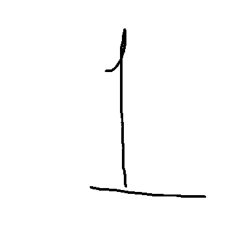

Result:  1


In [77]:
plt.imshow(plt.imread("/content/sample 1.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])

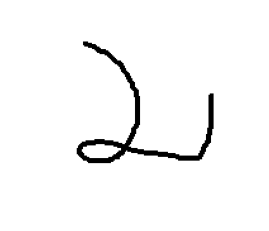

Result:  2


In [78]:
plt.imshow(plt.imread("/content/sample 2.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][1][1])

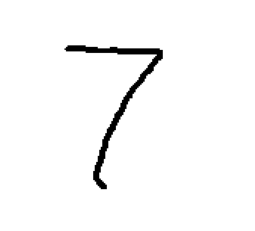

Result:  7


In [79]:
plt.imshow(plt.imread("/content/sample 7.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][2][1])